In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

Matplotlib is building the font cache; this may take a moment.


In [2]:
# 1. Load dataset from local path
dataset_path = "SMSSpamCollection"  
data = pd.read_csv(dataset_path, sep="\t", header=None, names=["label", "message"])


In [3]:
# 2. Preprocessing
data["label_num"] = data.label.map({"ham": 0, "spam": 1})

In [4]:
# 3. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    data["message"], data["label_num"], test_size=0.2, random_state=42
)

In [5]:
# 4. Feature extraction (TF-IDF)
vectorizer = TfidfVectorizer(stop_words="english")
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [6]:
# 5. Train model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [7]:
# 6. Evaluation
y_pred = model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.84      0.91       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



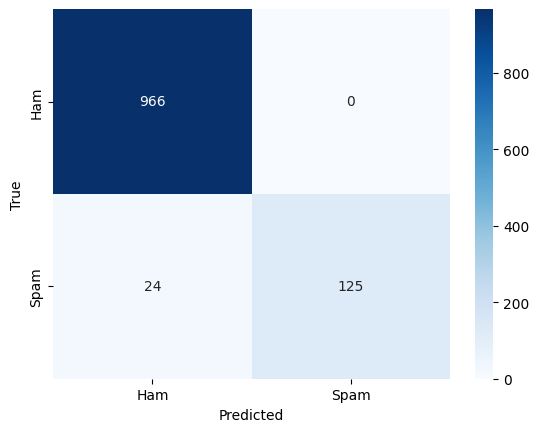

In [8]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Ham","Spam"], yticklabels=["Ham","Spam"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [9]:
# Save model + vectorizer
joblib.dump(model, "spam_model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")

['vectorizer.pkl']